In [92]:
# importing the necessary libraries or packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [93]:
os.chdir(r'E:/Final_Project/Model/RGT_training')

In [94]:
cars_data = pd.read_csv("car data.csv")
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [95]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
cars_data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [97]:
cars_data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [98]:
cars_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [99]:
cars_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [100]:
print(cars_data['Selling_Price'].value_counts())
print(cars_data['Present_Price'].value_counts())
print(cars_data['Fuel_Type'].value_counts())
print(cars_data['Seller_Type'].value_counts())
print(cars_data['Transmission'].value_counts())

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Present_Price
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: count, Length: 147, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [101]:
selling_price = cars_data['Selling_Price']
present_price = cars_data['Present_Price']
fueltype = cars_data['Fuel_Type']
sellertype = cars_data['Seller_Type']
transmission = cars_data['Transmission']

In [102]:
from matplotlib import style

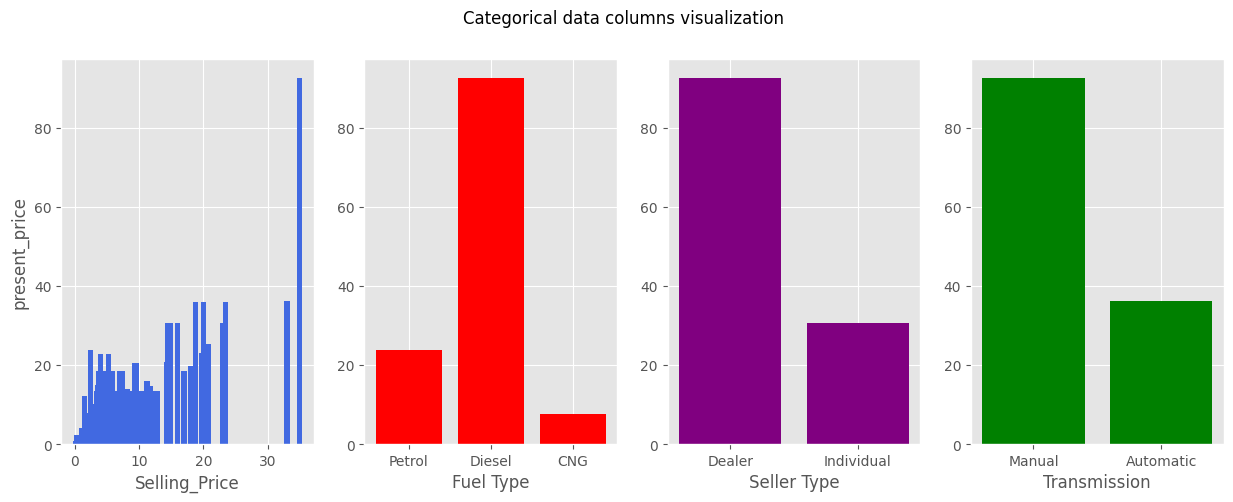

In [103]:
style.use('ggplot')
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Categorical data columns visualization')
plt.subplot(1, 4, 1)
plt.bar(selling_price, present_price, color='royalblue')
plt.xlabel("Selling_Price")
plt.ylabel("present_price")
plt.subplot(1, 4, 2)
plt.bar(fueltype, present_price, color='red')
plt.xlabel("Fuel Type")
plt.subplot(1, 4, 3)
plt.bar(sellertype, present_price, color='purple')
plt.xlabel("Seller Type")
plt.subplot(1, 4, 4)
plt.bar(transmission, present_price, color='green')
plt.xlabel("Transmission")
plt.show()

<Axes: xlabel='Transmission', ylabel='Present_Price'>

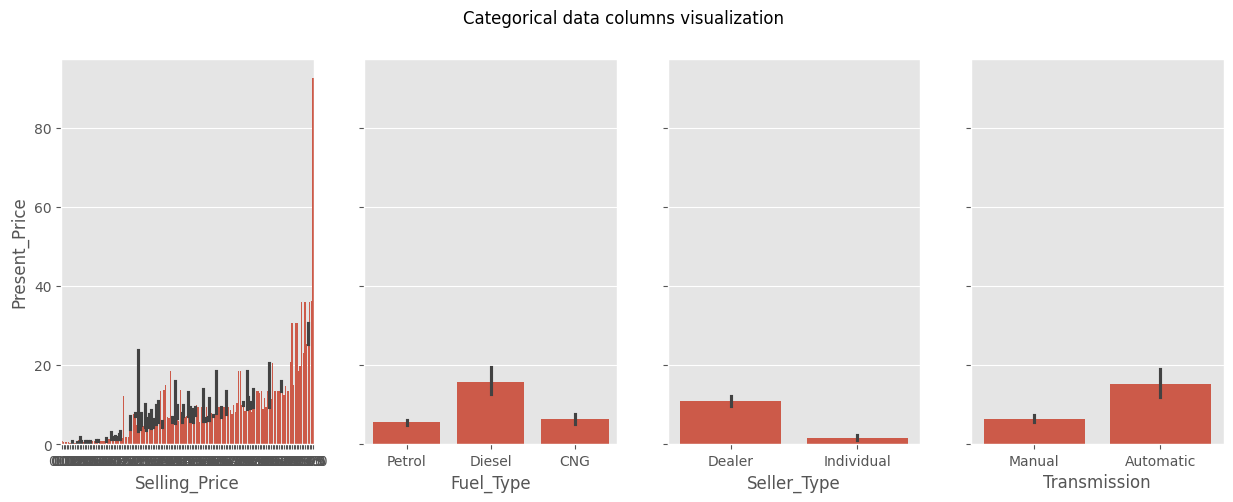

In [104]:
fig, axes = plt.subplots(1,4,figsize=(15,5), sharey=True)
fig.suptitle('Categorical data columns visualization')
sns.barplot(x=selling_price, y=present_price, ax=axes[0])
sns.barplot(x=fueltype, y=present_price, ax=axes[1])
sns.barplot(x=sellertype, y=present_price, ax=axes[2])
sns.barplot(x=transmission, y=present_price, ax=axes[3])

In [105]:
fuel_data = cars_data.groupby('Fuel_Type').get_group('Petrol')
fuel_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [106]:
fuel_data = cars_data.groupby('Seller_Type').get_group('Dealer')
fuel_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [107]:
#columns_to_drop = ['Kms_Driven']

In [108]:
# Drop the specified columns
#cars_data.drop(columns=columns_to_drop, inplace=True)


In [109]:
#cars_data.head()

In [110]:
# manual encoding
cars_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
cars_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,0,0
4,swift,2014,4.60,6.87,42450,1,Dealer,0,0


In [111]:
# one hot encoding
cars_data = pd.get_dummies(cars_data, columns=['Seller_Type', 'Transmission'], drop_first=True)
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_1
0,ritz,2014,3.35,5.59,27000,0,0,False,False
1,sx4,2013,4.75,9.54,43000,1,0,False,False
2,ciaz,2017,7.25,9.85,6900,0,0,False,False
3,wagon r,2011,2.85,4.15,5200,0,0,False,False
4,swift,2014,4.60,6.87,42450,1,0,False,False


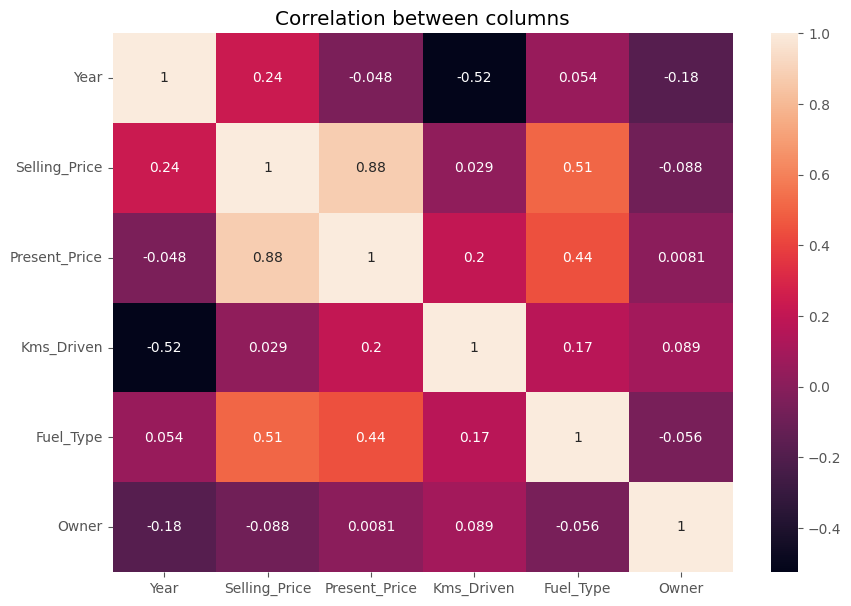

In [112]:
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

# Lighter color -> higher correlation value
# Darker color -> lower correlation value

<Axes: title={'center': 'Correlation between Selling_Price and Present_Price'}, xlabel='Present_Price', ylabel='Selling_Price'>

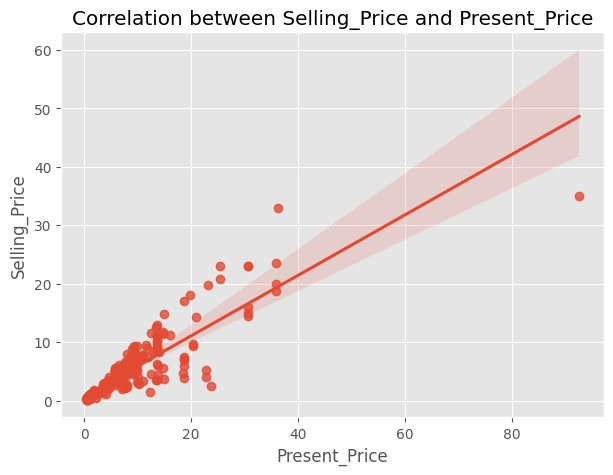

In [113]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Selling_Price and Present_Price')
sns.regplot(x='Present_Price', y='Selling_Price', data=cars_data)

In [115]:
x = cars_data.drop(['Car_Name','Selling_Price'], axis=1)
y = cars_data['Selling_Price']

In [116]:
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)

Shape of x is:  (301, 7)
Shape of y is:  (301,)


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
# training set = 70%
# testing set = 30% 

In [118]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (210, 7)
x_test shape:  (91, 7)
y_train shape:  (210,)
y_test shape:  (91,)


In [119]:
scaler = StandardScaler()

In [120]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [121]:
model = LinearRegression()

In [122]:
model.fit(x_train, y_train)

LinearRegression()

In [123]:
pred = model.predict(x_test)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [125]:
# Calculate and print metrics
mae = metrics.mean_absolute_error(pred, y_test)
mse = metrics.mean_squared_error(pred, y_test)
r2 = metrics.r2_score(pred, y_test)

print("MAE:", mae)
print("MSE:", mse)
print("R2 score:", r2)

MAE: 1.2319533008766874
MSE: 3.457953845833788
R2 score: 0.8528582949898238


In [126]:
# Calculate and print accuracy
accuracy = 1 - mae/np.mean(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7467464468344849


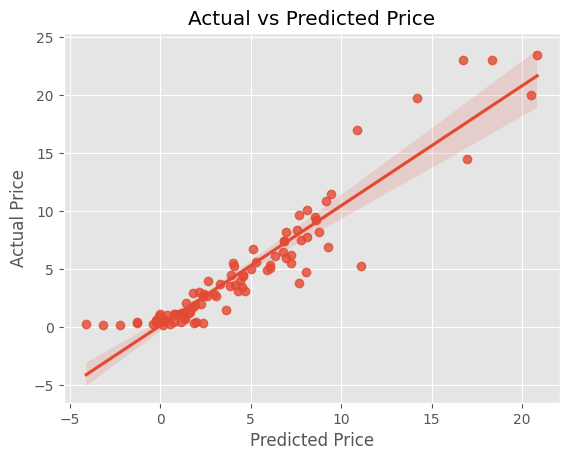

In [127]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()